In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

!pip install joypy
from joypy import joyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Read in summarization similarity results  

In [3]:
data_dir = '/content/drive/MyDrive/Linguistic abstraction summer 2023/Datasets/'

In [4]:
div_keybert = pd.read_csv(data_dir+'Diversity study abstraction results/hetero_homo_KeyBERT_sim.csv', index_col=0)
div_bart = pd.read_csv(data_dir+'Diversity study abstraction results/hetero_homo_bart_sim.csv', index_col=0)
div_pegasus = pd.read_csv(data_dir+'Diversity study abstraction results/hetero_homo_pegasus_sim.csv', index_col=0)

pilot_ego_keybert = pd.read_csv(data_dir+'Pilot study abstraction results/pilot_KeyBERT_sim 01.24.23.csv', index_col=0).set_index('ID')
pilot_ego_keybert = pilot_ego_keybert.drop(index=24).reset_index(drop=True)
pilot_ego_bart = pd.read_csv(data_dir+'Pilot study abstraction results/pilot_bart_sim2sum 01.02.23.csv', index_col=0).set_index('ID')
pilot_ego_bart = pilot_ego_bart.drop(index=24).reset_index(drop=True)
pilot_ego_pegasus = pd.read_csv(data_dir+'Pilot study abstraction results/pilot_ego_pegasus_sim.csv').set_index('ID')
pilot_nyu_pegasus = pd.read_csv(data_dir+'Pilot study abstraction results/pilot_nyu_pegasus_sim.csv').set_index('ID')

proj_keybert = pd.read_csv(data_dir+'projection_study_keybert_results.csv', index_col=0)

#### Gather similarity scores

In [43]:
div_bart_sim1 = pd.concat([div_bart[c] for c in div_bart.iloc[:,5:7].columns], ignore_index=True)
div_bart_sim2 = pd.concat([div_bart[c] for c in div_bart.iloc[:,7:].columns], ignore_index=True)
div_keybert_sim1 = pd.concat([div_keybert[c] for c in div_keybert.iloc[:,7:9].columns], ignore_index=True)
div_keybert_sim2 = pd.concat([div_keybert[c] for c in div_keybert.iloc[:,9:].columns], ignore_index=True)
div_pegasus_sim1 = pd.concat([div_pegasus[c] for c in div_pegasus.iloc[:,4:6].columns], ignore_index=True)
div_pegasus_sim2 = pd.concat([div_pegasus[c] for c in div_pegasus.iloc[:,6:].columns], ignore_index=True)
div_scores = pd.concat([div_bart_sim1, div_bart_sim2, div_keybert_sim1, div_keybert_sim2, div_pegasus_sim1, div_pegasus_sim2], axis=1)
div_scores.columns = ['bart_sim1', 'bart_sim2', 'keybert_sim1', 'keybert_sim2', 'pegasus_sim1', 'pegasus_sim2']
div_scores

,bart_sim1,bart_sim2,keybert_sim1,keybert_sim2,pegasus_sim1,pegasus_sim2
0,0.803772,0.848698,0.595242,0.591137,0.501683,0.582207
1,0.945102,0.878405,0.625332,0.590350,0.193676,0.377779
2,0.639953,0.583239,0.539874,0.547698,0.102204,-0.017377
3,0.408163,0.507997,0.588942,0.430222,0.199101,0.235894
4,0.647097,0.653579,0.422206,0.520343,0.700222,0.679117
...,...,...,...,...,...,...
657,0.644138,0.426776,0.477030,0.470354,0.559178,0.603896
658,0.626289,0.618985,0.497420,0.583075,0.555332,0.475442
659,0.896352,0.872694,0.591105,0.672866,0.667965,0.672562
660,0.612154,0.631386,0.673660,0.565193,0.230073,0.164247


In [39]:
pilot_ego_bart_sim1 = pilot_ego_bart.iloc[:,8:12].to_numpy().reshape(-1,)
pilot_ego_bart_sim2 = pilot_ego_bart.iloc[:,12:].to_numpy().reshape(-1,)
pilot_ego_keybert_sim1 = pilot_ego_keybert.iloc[:,8:12].to_numpy().reshape(-1,)
pilot_ego_keybert_sim2 = pilot_ego_keybert.iloc[:,12:].to_numpy().reshape(-1,)
pilot_ego_pegasus_sim1 = pilot_ego_pegasus.iloc[:,8:12].to_numpy().reshape(-1,)
pilot_ego_pegasus_sim2 = pilot_ego_pegasus.iloc[:,12:].to_numpy().reshape(-1,)

pilot_scores = pd.DataFrame(np.stack([pilot_ego_bart_sim1, pilot_ego_bart_sim2, pilot_ego_keybert_sim1, pilot_ego_keybert_sim2, \
                       pilot_ego_pegasus_sim1, pilot_ego_pegasus_sim2], axis=1))
pilot_scores.columns = ['bart_sim1', 'bart_sim2', 'keybert_sim1', 'keybert_sim2', 'pegasus_sim1', 'pegasus_sim2']
pilot_scores

,bart_sim1,bart_sim2,keybert_sim1,keybert_sim2,pegasus_sim1,pegasus_sim2
0,0.849753,0.812113,0.779847,0.804422,0.491481,0.639682
1,0.936639,0.946899,0.617693,0.719223,-0.057010,-0.026497
2,0.942629,0.944497,0.731574,0.732404,0.533690,0.587868
3,0.936430,0.946942,0.837123,0.829733,0.490057,0.534583
4,0.825273,0.760576,0.908235,0.810381,-0.001413,-0.063873
...,...,...,...,...,...,...
763,0.932691,0.916898,0.909833,0.859480,0.753770,0.779186
764,0.798931,0.837325,0.595000,0.621872,0.727514,0.755839
765,0.687075,0.700361,0.582389,0.683105,0.409480,0.452426
766,0.921176,0.920162,0.821272,0.700552,0.457159,0.597639


In [44]:
combined_scores = pd.concat([div_scores, pilot_scores], ignore_index=True)

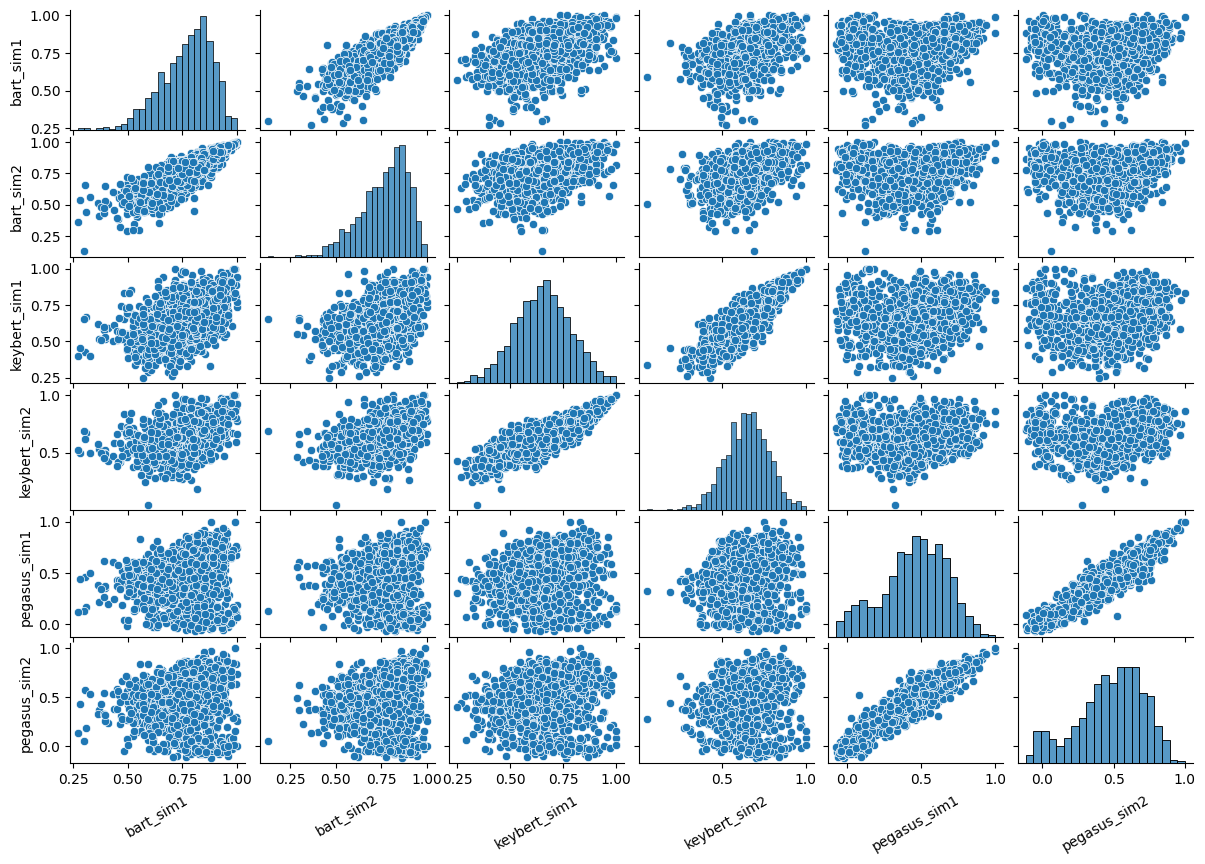

In [52]:
g = sns.pairplot(combined_scores)
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 30)
g.fig.set_size_inches(12,8)

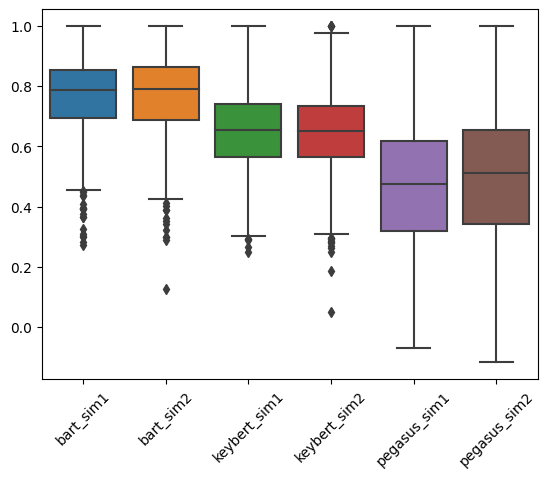

In [55]:
g = sns.boxplot(data=combined_scores)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

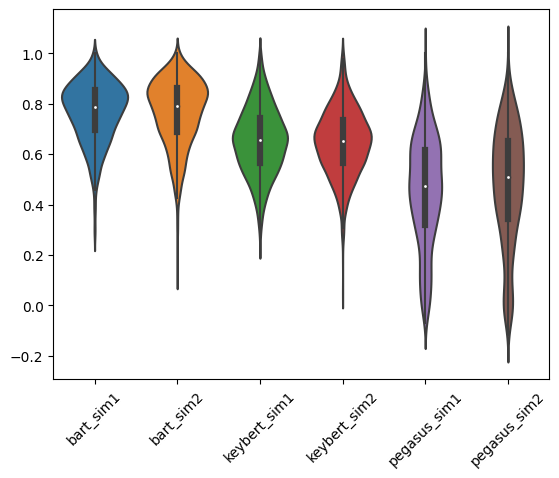

In [62]:
g = sns.violinplot(combined_scores)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

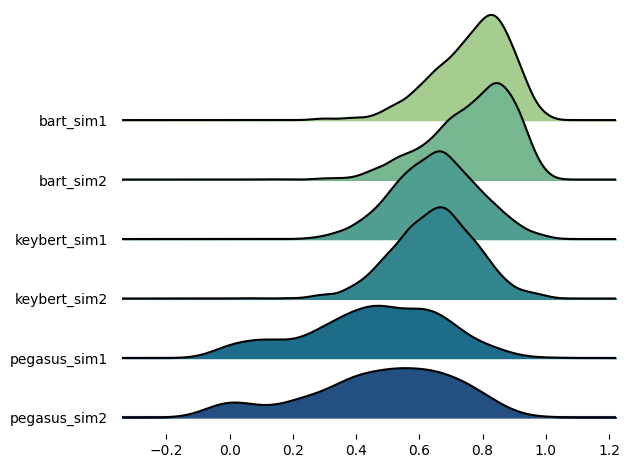

In [58]:
joyplot(combined_scores, colormap=sns.color_palette("crest", as_cmap=True));

### Correlation Matrix

In [59]:
combined_scores.corr()

,bart_sim1,bart_sim2,keybert_sim1,keybert_sim2,pegasus_sim1,pegasus_sim2
bart_sim1,1.000000,0.841652,0.478786,0.447926,0.146223,0.131867
bart_sim2,0.841652,1.000000,0.471049,0.475613,0.162602,0.172343
keybert_sim1,0.478786,0.471049,1.000000,0.847523,0.139403,0.126317
keybert_sim2,0.447926,0.475613,0.847523,1.000000,0.131319,0.137161
pegasus_sim1,0.146223,0.162602,0.139403,0.131319,1.000000,0.931077
pegasus_sim2,0.131867,0.172343,0.126317,0.137161,0.931077,1.000000


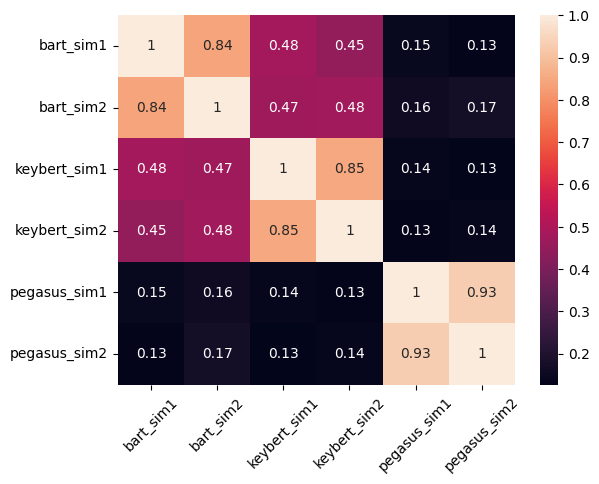

In [63]:
corr = combined_scores.corr()

# plot the heatmap
g = sns.heatmap(corr, annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
from scipy.stats._result_classes import PearsonRResult
import scipy.stats as stats

def pearson_ci(x,y,alpha=0.05):
    res = stats.pearsonr(x,y, alternative='two-sided')
    ci = res.confidence_interval()
    return ci.low, ci.high

In [ ]:
for i in range(len(combined_scores.columns)):
  for j in range(i+1, len(combined_scores.columns)):
    x,y = combined_scores.iloc[:,i], combined_scores.iloc[:,j]
    l,h = pearson_ci(x,y,alpha=0.05)
    print(l,h)

0.8267523636411162 0.8568601355376184
0.43942765754357355 0.519127603756652
0.4082713976902662 0.49083411755763506
0.43141160574654014 0.511864753267331
0.43695088430921536 0.5168847802631789
0.8325715717100369 0.8617445929281714


### KMeans

In [ ]:
n = div_bart.shape[0]
labels = np.zeros(n*2)
labels[:n] = 1

In [ ]:
X = np.vstack([div_bart.iloc[:, 5:], div_keybert.iloc[:,7:]])
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
kmeans

KMeans(n_clusters=2, n_init='auto', random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[0.56217383, 0.56266746, 0.56054361, 0.55495855],
       [0.75177212, 0.72666729, 0.75862241, 0.71290155]])

In [ ]:
centroid_2d = pca.fit_transform(kmeans.cluster_centers_)

In [ ]:
centroid_2d

array([[ 1.78202593e-01,  6.24500451e-17],
       [-1.78202593e-01,  6.24500451e-17]])

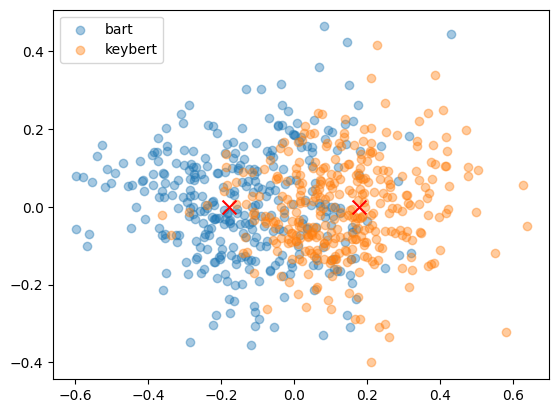

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)
plt.scatter(pca_2d[:,0][:n], pca_2d[:,1][:n],label='bart',alpha=0.4)
plt.scatter(pca_2d[:,0][n:], pca_2d[:,1][n:],label='keybert',alpha=0.4)
plt.scatter(centroid_2d[0][0], centroid_2d[0][1],c='r',marker='x',s=100)
plt.scatter(centroid_2d[1][0], centroid_2d[1][1],c='r',marker='x', s=100)
plt.legend()